Logistic Regression training with original and grid search cross validation.

In [4]:
# All imports organized into one cell
import sys
import math
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.figure_factory as ff
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import imblearn.over_sampling 
from imblearn.over_sampling import SMOTE
import sys
import warnings

# Get rid of warnings
warnings.filterwarnings('ignore')

In [5]:
# read data in
data = pd.read_csv('./online_shoppers_intention.csv')

data


Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]

In [6]:
# iteration without TrafficType and Region as they have lowest pearson correlation to Revenue
categorical_features = ['OperatingSystems', 'Browser', 'VisitorType', 'Weekend', 'Month']
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

transformers = [
    ('one_hot', OneHotEncoder(), categorical_features),
    ('robustscale', RobustScaler(), numerical_features),  # Or RobustScaler() as needed
    ('minscale', MinMaxScaler(), numerical_features)  # Or MinMaxScaler() as needed
]

preprocessor = ColumnTransformer(transformers=transformers)

# Drop unnecessary categories in training data
x = data.drop(['Revenue', 'Region', 'TrafficType'], axis=1) 
y = data['Revenue'].astype(int) # Target


# Apply transformations
x_preproc = preprocessor.fit_transform(x)

# Splitting the dataset into develop data and final validation comparison
x_dev, x_val, y_dev, y_val = train_test_split(x_preproc, y, test_size=0.1, random_state=42)

# Apply SMOTE algorithm to even out amount of data for development for purchases to no purchases
print("Development Set Revenue Freq: ")
print(y_dev.value_counts(), "\n")
smo = SMOTE()
x_os, y_os = smo.fit_resample(x_dev, y_dev)
print("Oversampled Development Data Revenue Freq: ")
print(y_os.value_counts(), "\n")

# Splitting the dataset into training and testing sets after preprocessing all data
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.2, random_state=42)

Development Set Revenue Freq: 
Revenue
0    9392
1    1705
Name: count, dtype: int64 

Oversampled Development Data Revenue Freq: 
Revenue
0    9392
1    9392
Name: count, dtype: int64 



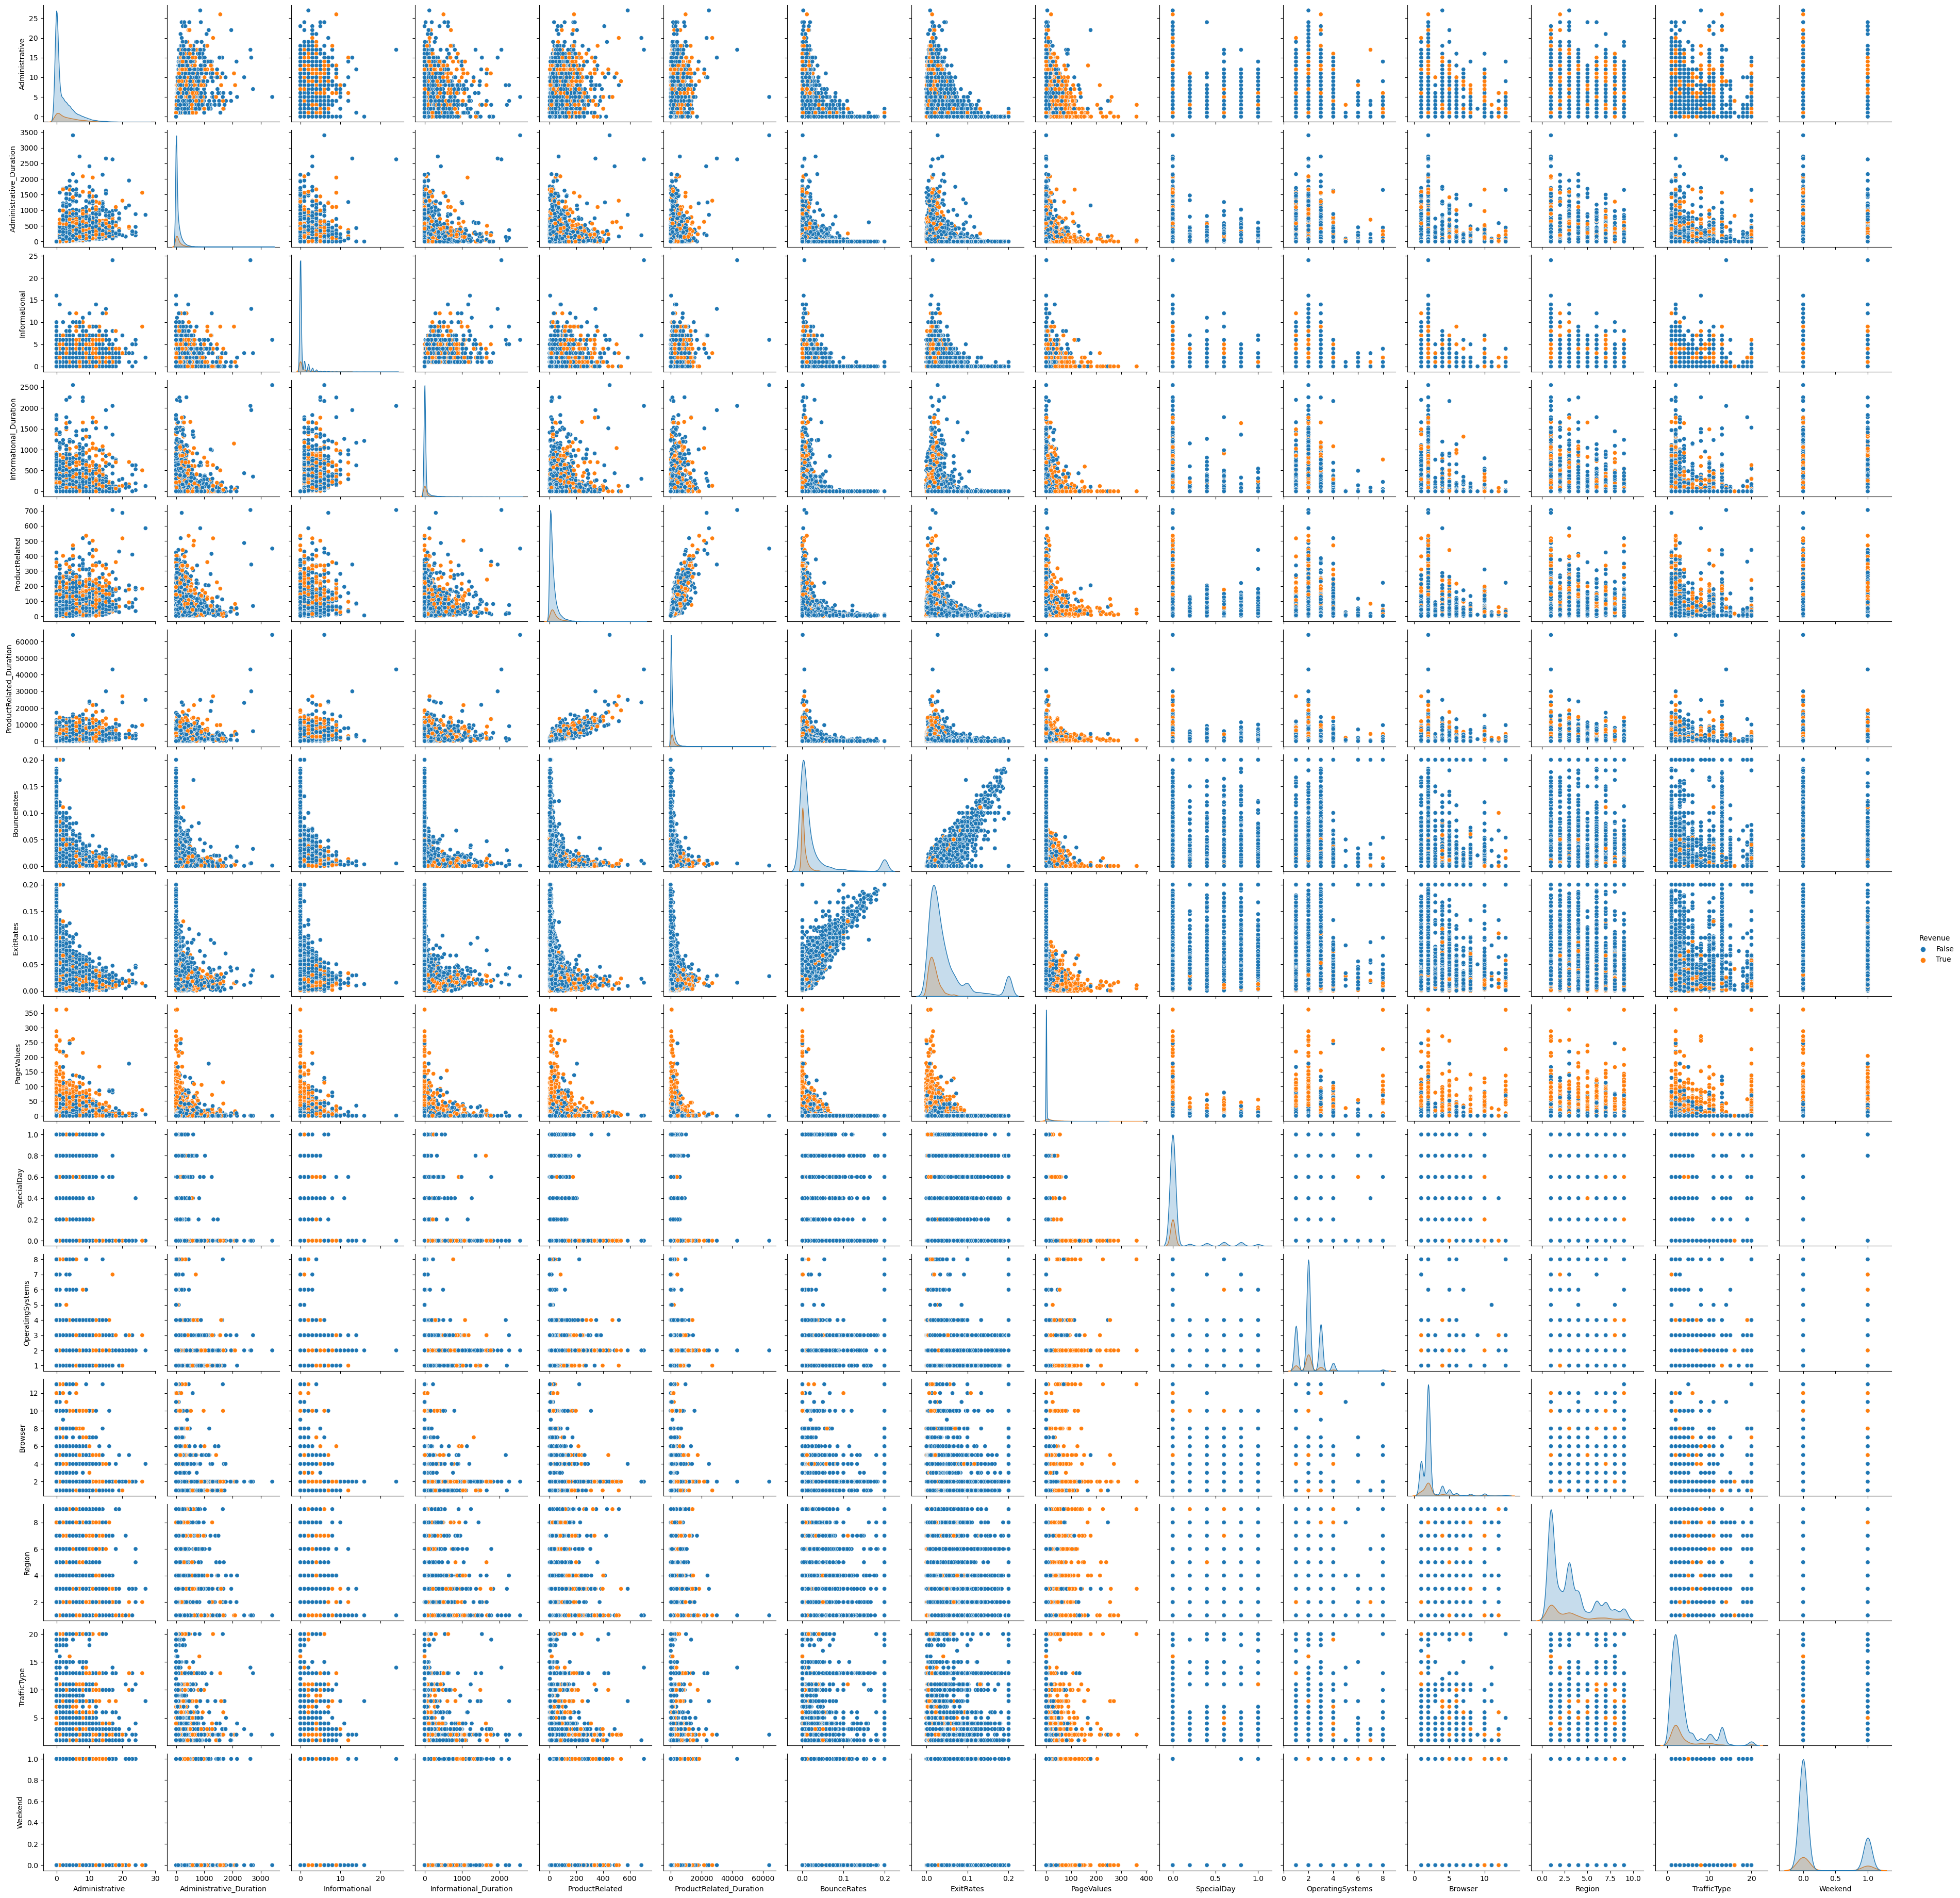

In [6]:
# Seaborn solution
_ = sns.pairplot(data, hue='Revenue', diag_kind='kde')

In [7]:
# establish initial logistic regression
cls = LogisticRegression()
cls.fit(x_train, y_train)
print(classification_report(y_test, cls.predict(x_test)))

# Get train/test accuracy of model
accuracy_test = cls.score(x_test, y_test)
print('Accuracy Test: %.3f' % (accuracy_test * 100))
accuracy_train = cls.score(x_train, y_train)
print('Accuracy Train: %.3f' % (accuracy_train * 100))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1877
           1       0.85      0.77      0.81      1880

    accuracy                           0.82      3757
   macro avg       0.82      0.82      0.82      3757
weighted avg       0.82      0.82      0.82      3757

Accuracy Test: 81.554
Accuracy Train: 82.239


In [8]:
# params to evaluate
param_distributions = {
    'penalty': ['l2', 'l1', 'elasticnet', ''],
    'C': [8.7, 8.4, 8.0]
}

cls_grids = LogisticRegression(random_state=42)

# set up GridSearchCV
grid_search = GridSearchCV(estimator=cls_grids, param_grid=param_distributions, scoring=['accuracy'], refit='accuracy', cv=40, verbose=2)

# run the Grid search
grid_search.fit(x_dev, y_dev)

# report best
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_  # Negating to get positive MSE value

# Accuracy given by positive number
best_params, best_accuracy

Fitting 40 folds for each of 12 candidates, totalling 480 fits
[CV] END ..................................C=8.7, penalty=l2; total time=   0.1s
[CV] END ..................................C=8.7, penalty=l2; total time=   0.2s
[CV] END ..................................C=8.7, penalty=l2; total time=   0.4s
[CV] END ..................................C=8.7, penalty=l2; total time=   0.2s
[CV] END ..................................C=8.7, penalty=l2; total time=   0.1s
[CV] END ..................................C=8.7, penalty=l2; total time=   0.6s
[CV] END ..................................C=8.7, penalty=l2; total time=   0.2s
[CV] END ..................................C=8.7, penalty=l2; total time=   0.2s
[CV] END ..................................C=8.7, penalty=l2; total time=   0.1s
[CV] END ..................................C=8.7, penalty=l2; total time=   0.2s
[CV] END ..................................C=8.7, penalty=l2; total time=   0.2s
[CV] END ..................................C=8

({'C': 8.4, 'penalty': 'l2'}, 0.8874483806456641)

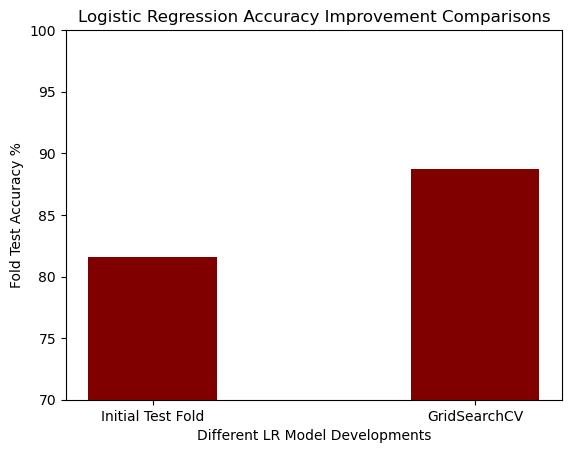

In [9]:
# Print the bar plot for accuracy comparisons with each trial of different appraoch to retrieving model
test_accuracies = [81.55, 88.74]
categories =['Initial Test Fold', 'GridSearchCV']
# creating the bar plot
plt.bar(categories, test_accuracies, color ='maroon', 
        width = 0.4)
plt.ylim(70, 100) 
plt.xlabel("Different LR Model Developments")
plt.ylabel("Fold Test Accuracy %")
plt.title("Logistic Regression Accuracy Improvement Comparisons")
plt.show()

In [10]:
# test against the validation data final
y_pred_val = grid_search.best_estimator_.predict(x_val)

# Print out all metrics for final validatino; mainly accuracy, f1-score, TPR, FPR 
accuracy_val = accuracy_score(y_val, y_pred_val)
print('GridSearchCV Accuracy Validation: %.3f' % (accuracy_val * 100), '%')
print(classification_report(y_val, y_pred_val))
metrics_results = classification_report(y_val, y_pred_val, output_dict = True)
print('F1-Score: ', metrics_results['macro avg']['f1-score'], '\n')
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_val, labels=[0, 1]).ravel()
print(confusion_matrix(y_val, y_pred_val))
print('True Positive Rate: ', tp/(tp + fn))
print('False Positive Rate: ', fp/(fp + tn))

GridSearchCV Accuracy Validation: 86.375 %
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1030
           1       0.69      0.31      0.43       203

    accuracy                           0.86      1233
   macro avg       0.78      0.64      0.68      1233
weighted avg       0.85      0.86      0.84      1233

F1-Score:  0.675611681136543 

[[1002   28]
 [ 140   63]]
True Positive Rate:  0.3103448275862069
False Positive Rate:  0.027184466019417475


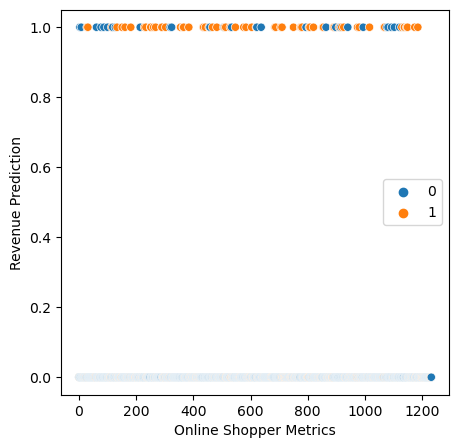

In [36]:
# Print out graph of validation
y_pred_val = y_pred_val.squeeze()
plt.figure(figsize=(5, 5))
sns.scatterplot(x = range(0, 1233), y = y_pred_val, hue = y_val)
plt.xlabel('Online Shopper Metrics')
plt.ylabel('Revenue Prediction')
plt.legend()